# Creating a Noisy image from the original Image

## Importing the required Libraries

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
import random

## Now defining the imshow() function 

In [5]:
def imshow(title = 'image', image = None, size =10):
    w,h=image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size, size ))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## Reading the original image

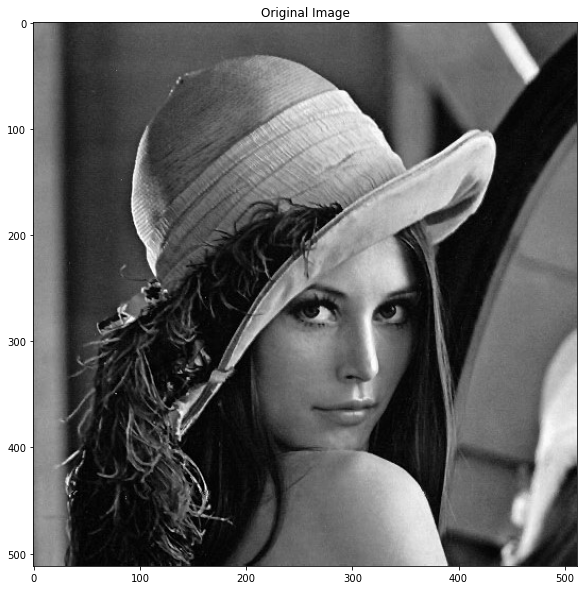

[[[141 141 141]
  [142 142 142]
  [138 138 138]
  ...
  [ 90  90  90]
  [ 90  90  90]
  [ 90  90  90]]

 [[138 138 138]
  [140 140 140]
  [139 139 139]
  ...
  [ 90  90  90]
  [ 90  90  90]
  [ 91  91  91]]

 [[135 135 135]
  [140 140 140]
  [140 140 140]
  ...
  [ 91  91  91]
  [ 91  91  91]
  [ 90  90  90]]

 ...

 [[109 109 109]
  [105 105 105]
  [113 113 113]
  ...
  [ 24  24  24]
  [ 24  24  24]
  [ 25  25  25]]

 [[109 109 109]
  [105 105 105]
  [113 113 113]
  ...
  [ 22  22  22]
  [ 22  22  22]
  [ 23  23  23]]

 [[106 106 106]
  [103 103 103]
  [112 112 112]
  ...
  [ 24  24  24]
  [ 23  23  23]
  [ 24  24  24]]]


In [6]:
original_image = cv2.imread("C:\\Users\\baksh\\Desktop\\The-famous-Lena-image-often-used-as-an-example-in-image-processing.jpg")
imshow('Original Image', original_image)
print(original_image)

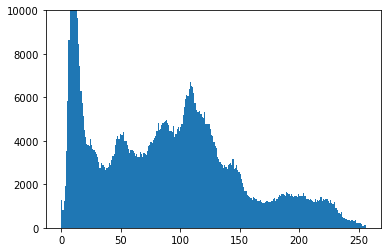

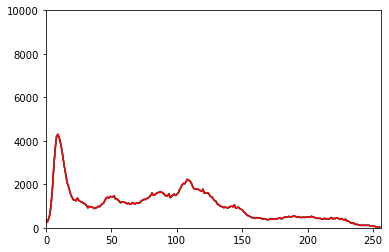

In [8]:
plt.hist(original_image.ravel(),256,[0,256])
plt.ylim([0,10000])
plt.show()

#now seperating the color channels
color = ('b', 'g', 'r')
# seperating the color channels and plotting the histogram 
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([original_image],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,10000])
    
plt.show()

## Converting the original_image to gray scale image 

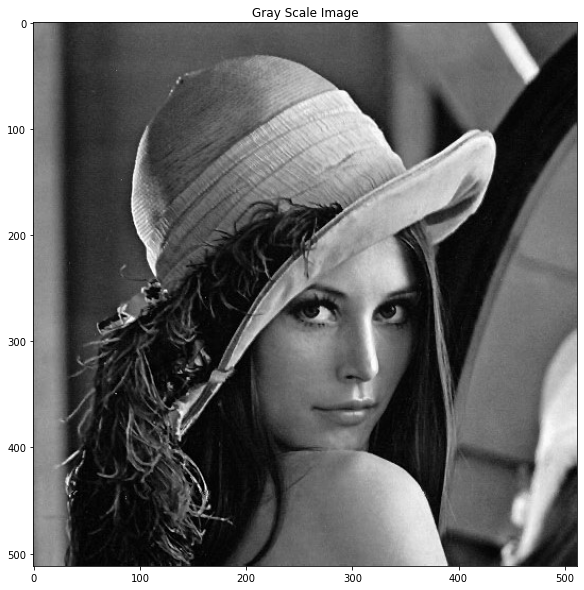

[[141 142 138 ...  90  90  90]
 [138 140 139 ...  90  90  91]
 [135 140 140 ...  91  91  90]
 ...
 [109 105 113 ...  24  24  25]
 [109 105 113 ...  22  22  23]
 [106 103 112 ...  24  23  24]]


In [9]:
image_gray=cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
imshow('Gray Scale Image', image_gray)
print(image_gray)

## plotting Histogram of image_gray 

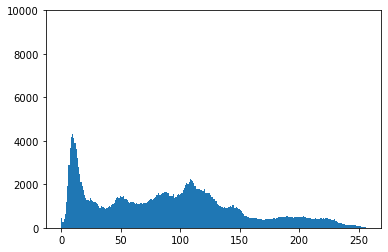

In [11]:
plt.hist(image_gray.ravel(),256,[0,256])
plt.ylim([0,10000])
plt.show()

## Adding Blur to the grayscaled image

### there are three major types of blurring 
regular blurring #
gaussian blurring 
median blurring 

### Regular Blurring / Averaging  
Thus is done  by convolving the image with a normalized box filter
takes the pixels in the box and replaces the central central element
box size = odd and positive

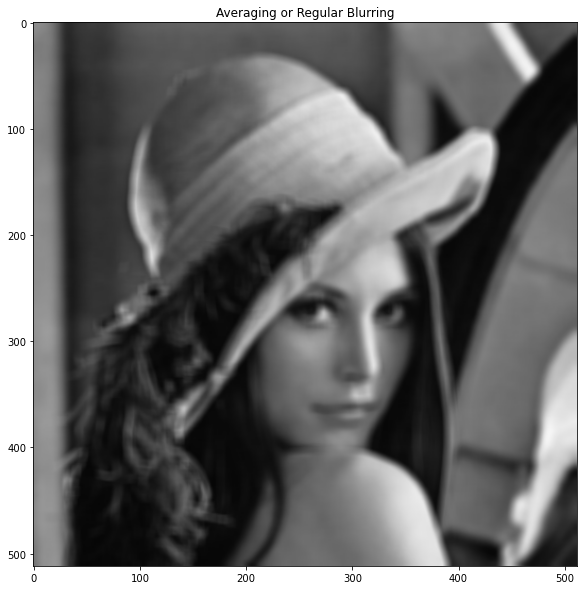

[[140 140 140 ...  90  91  91]
 [140 140 140 ...  91  91  91]
 [140 140 140 ...  91  90  90]
 ...
 [118 118 120 ...  23  24  24]
 [117 118 120 ...  23  24  24]
 [117 118 120 ...  23  24  24]]


In [44]:
blur = cv2.blur(image_gray,(9,9))
imshow('Averaging or Regular Blurring',blur)
print(blur)

### Gaussian Blur
instead of the box filter, it makes use of the gaussian kernel # The kernel matrix size ought to be odd and positive here 

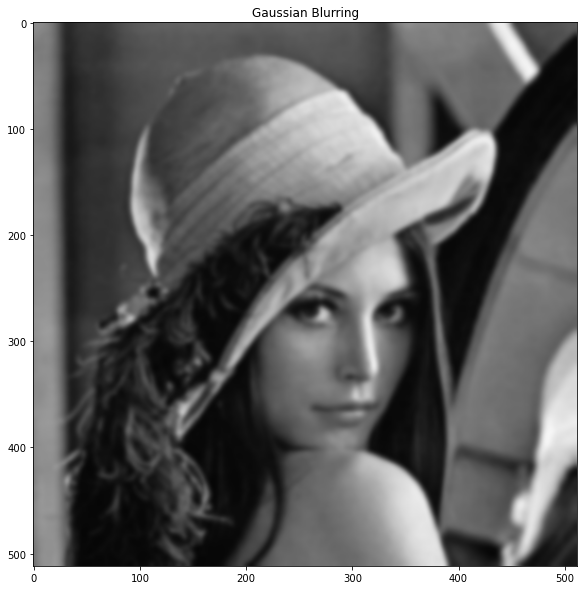

[[140 140 140 ...  90  91  91]
 [140 140 140 ...  90  91  91]
 [140 140 140 ...  91  91  91]
 ...
 [115 116 119 ...  24  24  24]
 [114 115 118 ...  24  24  24]
 [114 115 118 ...  24  24  24]]


In [43]:
 gaussian_blur = cv2.GaussianBlur(image_gray,(13,13),0)
imshow('Gaussian Blurring', gaussian_blur)
print(gaussian_blur)

### Median Blurring 
median = it takes all the pixels under a kernel and centre it
element is replaced by the median value


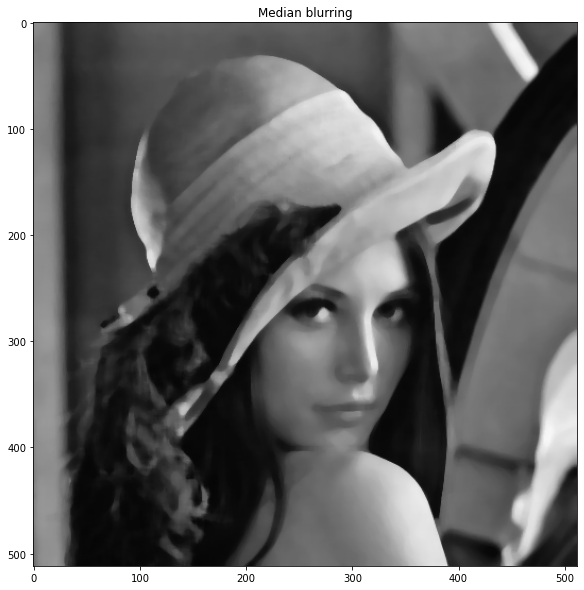

[[141 140 140 ...  90  90  90]
 [140 140 140 ...  90  90  90]
 [140 140 140 ...  90  90  90]
 ...
 [111 113 115 ...  24  24  25]
 [111 112 115 ...  24  24  24]
 [109 112 115 ...  24  24  24]]


In [42]:
median = cv2.medianBlur(image_gray,9)
imshow('Median blurring',median)
print(median)

### Adding Noise to the blurred image
Adding white noise to the blurred image. Since the blurr gained is from 3 images we intend to produce 3 images with added white noise or a film of grain

In [33]:
def addWhiteNoise(image):
    #setting the range of random probablity
    # larger the prob larger will be the noise 
    prob = random.uniform(0.05,0.1)
    #generating a random matrix in the shape of the impur image 
    rnd = np.random.rand(image.shape[0], image.shape[1])
    # If the random values in our rnd matrix are less than our random probability
    # we randomly change that pixel in our input image to value within the range speciffied 
    image [rnd<prob]=np.random.randint(50,230)
    return image 

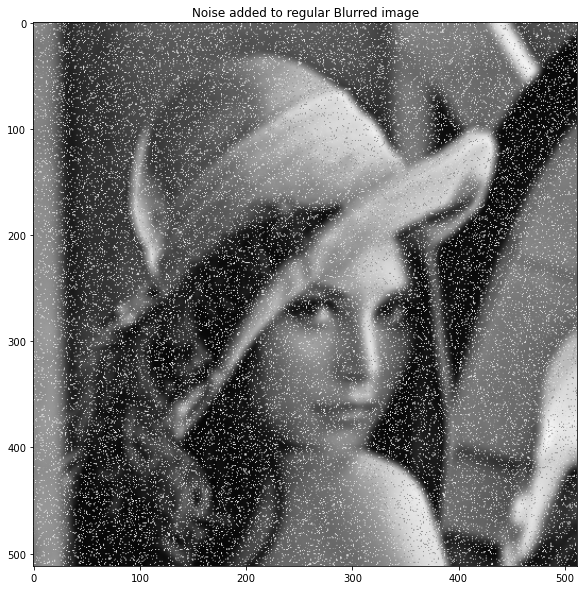

[[218 140 140 ...  90 218  91]
 [140 149 140 ...  91  91  91]
 [140 140 140 ...  91 218 218]
 ...
 [118 218 218 ...  23  24  24]
 [117 118 120 ...  23  24  24]
 [117 118 120 ...  23  24  24]]


In [46]:
# appling the noise function to our blurred image 
noise1 = addWhiteNoise(blur)
imshow('Noise added to regular Blurred image', noise1)
print(noise1)

### plotting histogram of the noise1 (Regular Blurred Image + White Noise)

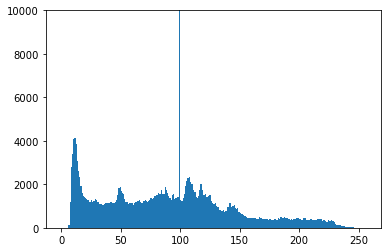

In [37]:
plt.hist(noise1.ravel(),256,[0,256])
plt.ylim([0,10000])
plt.show()

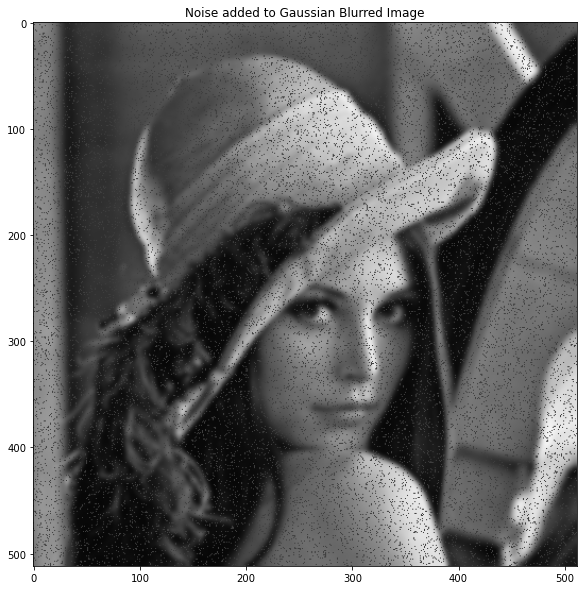

[[140 140 140 ...  90  91  91]
 [140 140 140 ...  90  91  91]
 [140  63 140 ...  91  91  91]
 ...
 [115 116 119 ...  24  63  24]
 [114 115 118 ...  24  24  24]
 [114 115 118 ...  24  24  24]]


In [47]:
noise2 = addWhiteNoise(gaussian_blur)
imshow('Noise added to Gaussian Blurred Image', noise2)
print(noise2)

### Plotting histogram of noise2 (Gaussian Blur + White Noise)

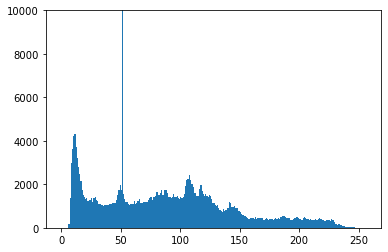

In [38]:
plt.hist(noise2.ravel(),256,[0,256])
plt.ylim([0,10000])
plt.show()

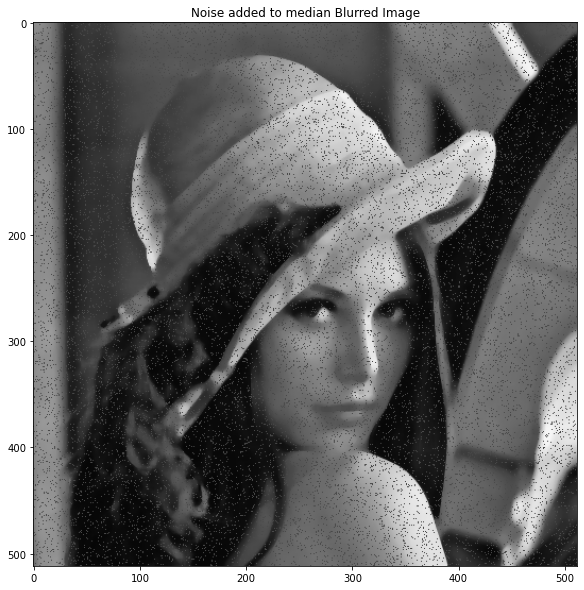

[[141 140 140 ...  90  74  90]
 [140 140 140 ...  90  90  74]
 [140 140 140 ...  90  90  90]
 ...
 [111 113  74 ...  24  24  25]
 [111 112 115 ...  24  24  24]
 [109 112 115 ...  24  24  24]]


In [48]:
noise3 = addWhiteNoise(median)
imshow('Noise added to median Blurred Image', noise3)
print(noise3)

### Plotting histogram of noise3 (Median Blurred + White Noise)

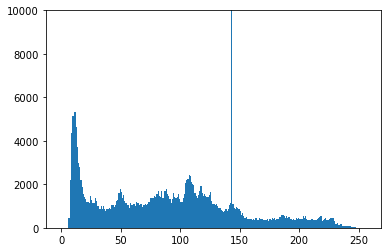

In [39]:
plt.hist(noise3.ravel(),256,[0,256])
plt.ylim([0,10000])
plt.show()

In [49]:
cv2.imwrite("C:\\Users\\baksh\\Desktop\\noise1.jpg", noise1)
cv2.imwrite("C:\\Users\\baksh\\Desktop\\noise2.jpg", noise2)
cv2.imwrite("C:\\Users\\baksh\\Desktop\\noise3.jpg", noise3)

True